In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
num_of_groups = 2
response_file = "data/test_input_small.csv"

In [3]:
df = pd.read_csv(response_file)
G = nx.DiGraph()
G.add_nodes_from(df['GTID'], bipartite=1)

papers = list(df.keys())
keys = ['Timestamp','First Name','Last Name','GTID']
papers = [x for x in papers if x not in keys]
G.add_nodes_from(papers, bipartite=0)

In [4]:
for index, row in df.iterrows():
    for paper in papers:
        G.add_edges_from([(row['GTID'], paper, {'capacity': 1, 'weight': 10-row[paper]})])

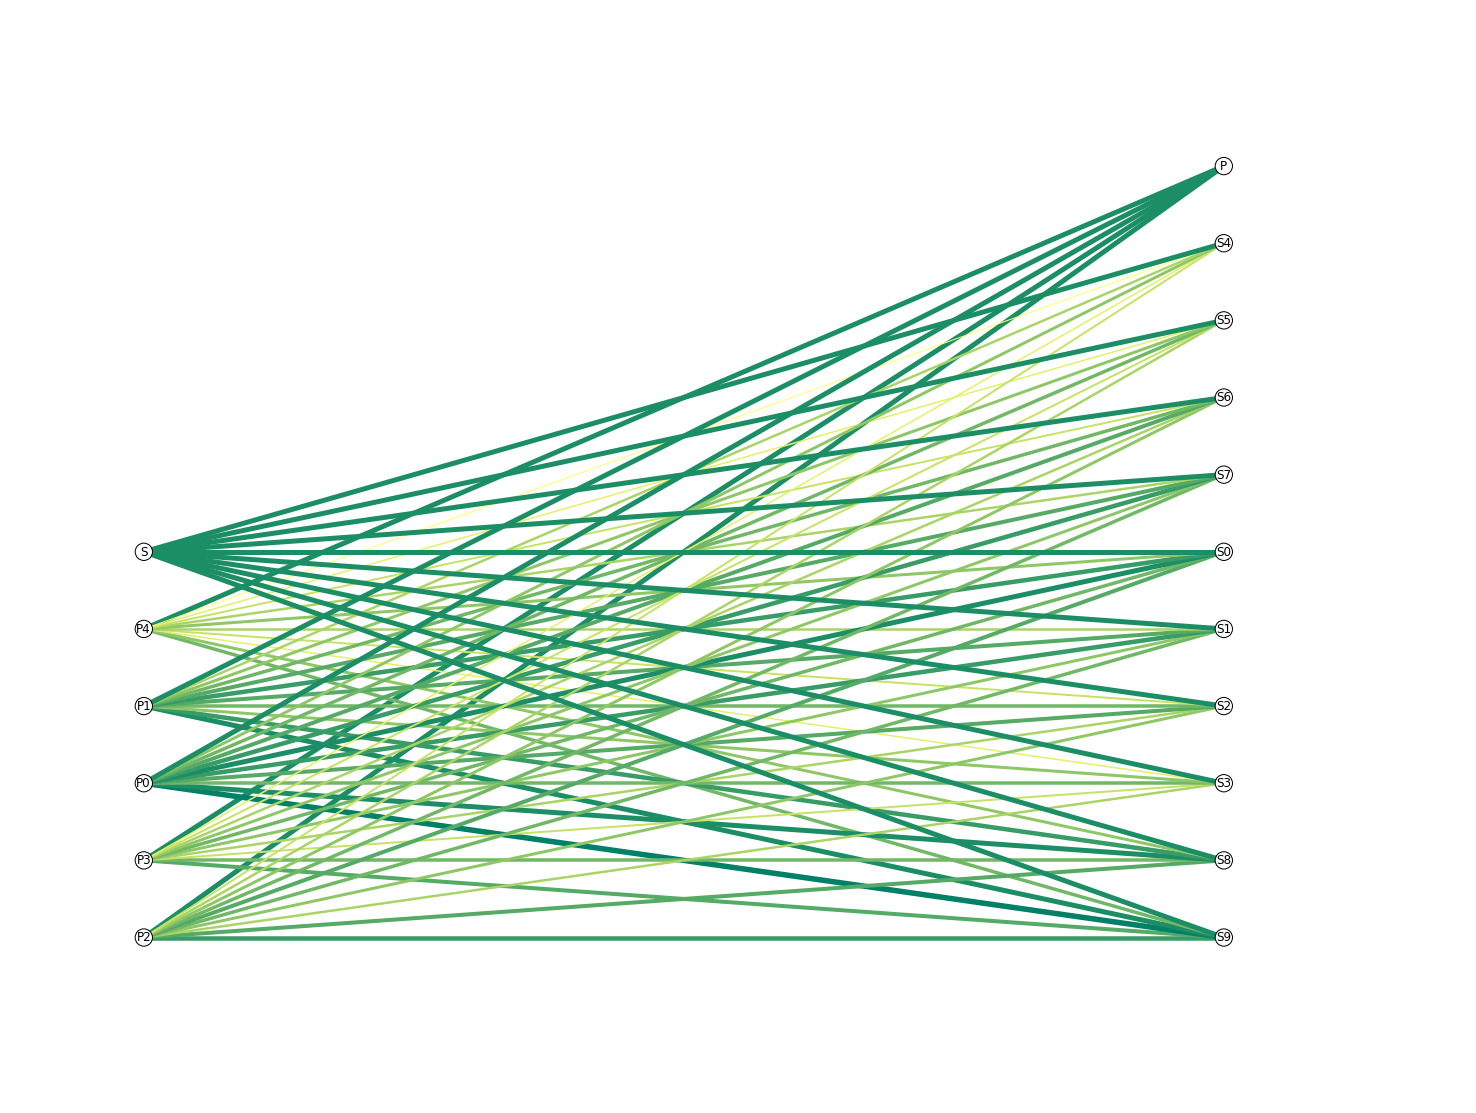

In [10]:
X, Y = nx.bipartite.sets(G)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (10, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

edge_width = []
edge_colors = []
edge_cmap = plt.cm.summer

for (u,v,d) in G.edges(data=True):
    edge_width.append((10-d['weight'])/2.0)
    edge_colors.append(d['weight'])

fig = plt.figure(figsize=[20,15])
nx.draw(G, pos=pos, width = edge_width, edge_color=edge_colors, node_color='w', with_labels=True, arrows=False, edge_cmap=edge_cmap)
plt.show()

In [6]:
G.add_node('S')
G.add_node('P')

for paper in papers:
    G.add_edges_from([(paper, 'P', {'capacity': num_of_groups, 'weight': 0})])

for index, row in df.iterrows():
    G.add_edges_from([('S', row['GTID'], {'capacity': 1, 'weight': 0})])

In [7]:
assignments = nx.max_flow_min_cost(G, 'S', 'P')
mincost = nx.cost_of_flow(G, assignments)
print"mincost: ", mincost
assignments

mincost:  35


{'P': {},
 'P0': {'P': 2},
 'P1': {'P': 2},
 'P2': {'P': 2},
 'P3': {'P': 2},
 'P4': {'P': 2},
 'S': {'S0': 1,
  'S1': 1,
  'S2': 1,
  'S3': 1,
  'S4': 1,
  'S5': 1,
  'S6': 1,
  'S7': 1,
  'S8': 1,
  'S9': 1},
 'S0': {'P0': 0, 'P1': 0, 'P2': 0, 'P3': 1, 'P4': 0},
 'S1': {'P0': 1, 'P1': 0, 'P2': 0, 'P3': 0, 'P4': 0},
 'S2': {'P0': 0, 'P1': 0, 'P2': 0, 'P3': 0, 'P4': 1},
 'S3': {'P0': 0, 'P1': 1, 'P2': 0, 'P3': 0, 'P4': 0},
 'S4': {'P0': 0, 'P1': 0, 'P2': 1, 'P3': 0, 'P4': 0},
 'S5': {'P0': 0, 'P1': 0, 'P2': 0, 'P3': 1, 'P4': 0},
 'S6': {'P0': 1, 'P1': 0, 'P2': 0, 'P3': 0, 'P4': 0},
 'S7': {'P0': 0, 'P1': 1, 'P2': 0, 'P3': 0, 'P4': 0},
 'S8': {'P0': 0, 'P1': 0, 'P2': 1, 'P3': 0, 'P4': 0},
 'S9': {'P0': 0, 'P1': 0, 'P2': 0, 'P3': 0, 'P4': 1}}

In [8]:
assigned = []
grouped = []
group_count = {}
for index, row in df.iterrows():
    assignment = assignments[row['GTID']]
    for node, flow in assignment.iteritems():
        if(flow == 1):
            paper = node
    group_count[paper] = group_count.get(paper, 0) + 1
    assigned.append(paper)
    grouped.append(group_count[paper])

df['Assigned'] = pd.Series(assigned, index=df.index)
df['Group'] = pd.Series(grouped, index=df.index)

In [9]:
dff = df.drop(papers + ['Timestamp','GTID'], 1)
dff.to_csv('data/test_output.csv',index=False)